In [4]:
import pandas as pd

df = pd.read_csv('closed_pull_requests_2023.csv')

total_pulls = len(df)
merged_pulls = df[df['merged']].shape[0]

print(f"Tổng số pull requests: {total_pulls}")
print(f"Số pull requests đã được merge: {merged_pulls}")


Tổng số pull requests: 826
Số pull requests đã được merge: 691


In [5]:
import pandas as pd
from datetime import timedelta

df = pd.read_csv('closed_pull_requests_2023.csv')

# Chuyển đổi cột thời gian thành datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['merged_at'] = pd.to_datetime(df['merged_at'])

# Tính thời gian trung bình để merge một pull request
merged_pulls = df[df['merged']]
total_time = merged_pulls['closed_at'] - merged_pulls['created_at']
average_time = total_time.mean()

print(f"Thời gian trung bình để merge một pull request: {average_time}")


Thời gian trung bình để merge một pull request: 11 days 10:25:17.509406657


In [6]:
import pandas as pd

df = pd.read_csv('closed_pull_requests_2023.csv')

accepted_pulls = df[df['merged']].shape[0]
rejected_pulls = df[~df['merged'] & (df['closed_at'].notnull())].shape[0]
total_pulls = accepted_pulls + rejected_pulls

accepted_ratio = accepted_pulls / total_pulls
rejected_ratio = rejected_pulls / total_pulls

print(f"Tỷ lệ pull requests được chấp nhận: {accepted_ratio:.2%}")
print(f"Tỷ lệ pull requests bị từ chối: {rejected_ratio:.2%}")

Tỷ lệ pull requests được chấp nhận: 83.66%
Tỷ lệ pull requests bị từ chối: 16.34%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV
df = pd.read_csv('closed_pull_requests_2023.csv')

In [11]:
# Chuyển đổi cột thời gian thành datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['merged_at'] = pd.to_datetime(df['merged_at'])

# Phân tích số lượng pull requests theo người tạo
author_counts = df['user'].value_counts()
top_authors = author_counts.head(10)

print("Những người tạo nhiều pull requests nhất:")
print(top_authors)


Những người tạo nhiều pull requests nhất:
user
asmorkalov        118
dkurt              51
fengyuentau        41
mshabunin          34
zihaomu            24
AleksandrPanov     23
vrabaud            23
VadimLevin         23
TolyaTalamanov     21
Abdurrahheem       19
Name: count, dtype: int64


In [30]:
# Xem xét tỷ lệ pull requests được chấp nhận của từng người
author_accepted_ratio = (df.groupby('user')['merged'].mean() * 100).round(3)
print("\nTỷ lệ pull requests được chấp nhận của từng người (%):")
print(author_accepted_ratio)



Tỷ lệ pull requests được chấp nhận của từng người (%):
user
0xMihir             100.000
333fps                0.000
Abdurrahheem         73.684
AleksandrPanov       95.652
AnnaPetrovicheva    100.000
                     ...   
zero-nnkn           100.000
zhixuwei              0.000
zihaomu              83.333
zixianweei          100.000
zzuliys             100.000
Name: merged, Length: 208, dtype: float64


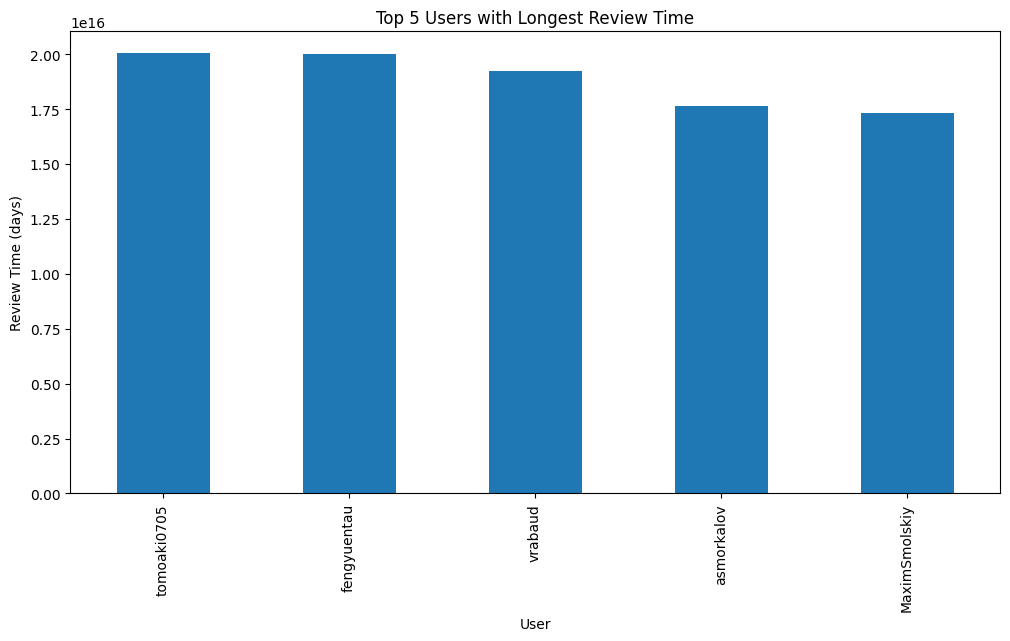

In [21]:
# Vẽ biểu đồ so sánh 5 người có thời gian pull lâu nhất
author_review_time = (df.groupby('user')['closed_at'].apply(lambda x: (x - x.min()).mean()))
top_long_review = author_review_time.nlargest(5)

fig, ax = plt.subplots(figsize=(12, 6))
top_long_review.plot(kind='bar', ax=ax)
ax.set_title('Top 5 Users with Longest Review Time')
ax.set_xlabel('User')
ax.set_ylabel('Review Time (days)')
plt.show()
